In [2]:
# https://cran.r-project.org/web/packages/ClusterR/vignettes/the_clusterR_package.html
df = read.csv("transactionData.csv")

In [3]:
df = df[,-1]

In [5]:
install.packages('ClusterR')

Installing package into 'C:/Users/matar/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

also installing the dependency 'gmp'




package 'gmp' successfully unpacked and MD5 sums checked
package 'ClusterR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\matar\AppData\Local\Temp\RtmpIJkXkH\downloaded_packages


In [4]:
library(ClusterR)

Warning message:
"package 'ClusterR' was built under R version 4.2.3"


In [5]:
head(df)

,blockNumber,gas,gasPrice,executionGas,callDataUsage,callDataLength,nonce,to,from
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,15627832,517689,57000000000,515877,1812,458,7235,6.973232e+47,6.994384e+47
2,15627832,517689,57000000000,515865,1824,458,3140,6.973232e+47,3.915221e+47
3,15627832,150000,30000000000,149356,644,138,11173680,7.785650e+47,1.436920e+48
4,15627832,71000,23214786296,71000,0,2,5293,4.956288e+47,4.956288e+47
5,15627832,500000,20000000000,498176,1824,458,1,6.973232e+47,4.249540e+47
6,15627832,469802,14090000000,458886,10916,2250,371,6.791231e+47,9.806636e+47


In [8]:
X = df[,c(3,4,5)]

In [15]:
dat = center_scale(X, mean_center = T, sd_scale = T)

In [16]:
gmm = GMM(dat, 2, dist_mode = "maha_dist", seed_mode = "random_subset", km_iter = 10,
          em_iter = 10, verbose = F)   

In [18]:
opt_gmm = Optimal_Clusters_GMM(dat, max_clusters = 10, criterion = "BIC", 
                               
                               dist_mode = "maha_dist", seed_mode = "random_subset",
                               
                               km_iter = 10, em_iter = 10, var_floor = 1e-10, 
                               
                               plot_data = T)

In [ ]:
# https://en.proft.me/2017/02/1/model-based-clustering-r/

In [6]:
#install.packages("mclust")
library(mclust)

Warning message:
"package 'mclust' was built under R version 4.2.3"
Package 'mclust' version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



In [9]:
mb = Mclust(X)

In [10]:
# optimal selected model
mb$modelName

[1] "VEV"

In [11]:
summary(mb)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 8 components: 

 log-likelihood     n df      BIC      ICL
      -666076.9 15006 65 -1332779 -1334770

Clustering table:
   1    2    3    4    5    6    7    8 
3695  699  184 1031  144 6947 1767  539 

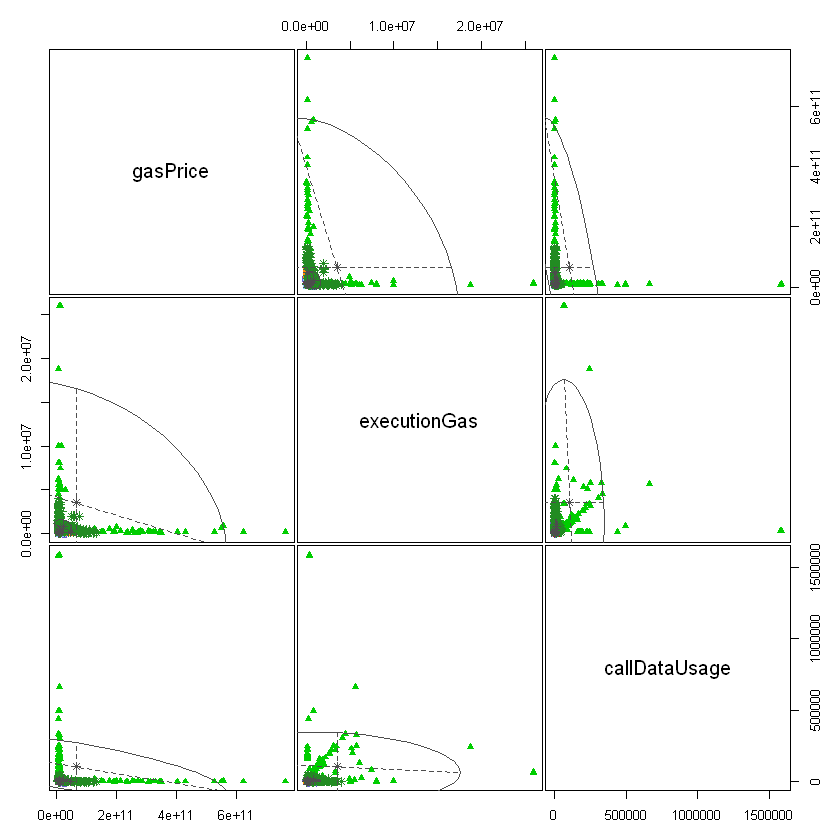

In [12]:
plot(mb, what=c("classification"))

In [13]:
df['Kclass'] <- mb$classification

In [14]:
head(df)

,blockNumber,gas,gasPrice,executionGas,callDataUsage,callDataLength,nonce,to,from,Kclass
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,15627832,517689,57000000000,515877,1812,458,7235,6.973232e+47,6.994384e+47,5
2,15627832,517689,57000000000,515865,1824,458,3140,6.973232e+47,3.915221e+47,5
3,15627832,150000,30000000000,149356,644,138,11173680,7.785650e+47,1.436920e+48,4
4,15627832,71000,23214786296,71000,0,2,5293,4.956288e+47,4.956288e+47,4
5,15627832,500000,20000000000,498176,1824,458,1,6.973232e+47,4.249540e+47,4
6,15627832,469802,14090000000,458886,10916,2250,371,6.791231e+47,9.806636e+47,8


In [16]:
library(ggplot2)

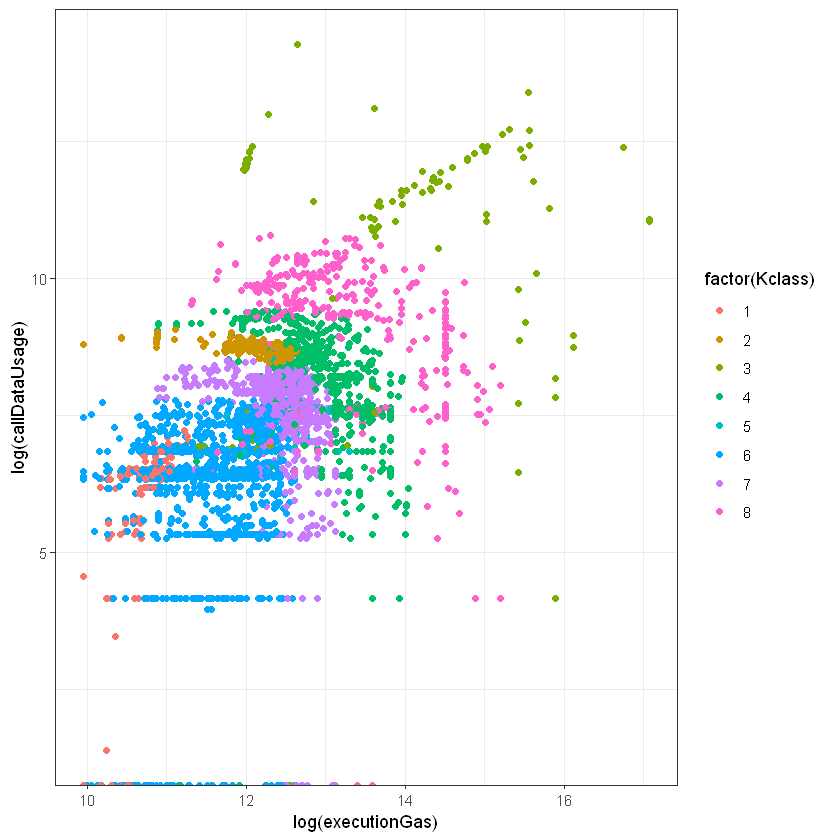

In [23]:
ggplot(df)  + 
  geom_point(aes(x = log(executionGas), y = log(callDataUsage),color=factor(Kclass))) +theme_bw()

In [26]:
mb = Mclust(df[,c(4,5)])

In [27]:
summary(mb)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEE (ellipsoidal, equal shape and orientation) model with 7 components: 

 log-likelihood     n df       BIC       ICL
      -318219.9 15006 29 -636718.6 -638957.1

Clustering table:
   1    2    3    4    5    6    7 
5869 5013 1806  573 1122  481  142 

In [28]:
df['Kclass'] <- mb$classification

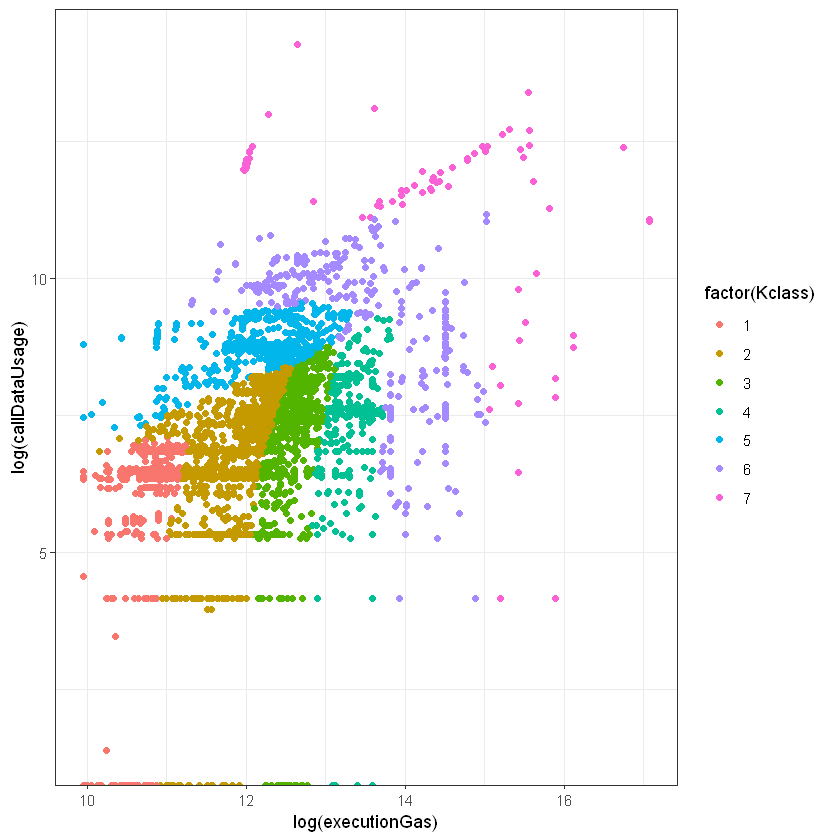

In [29]:
ggplot(df)  + 
  geom_point(aes(x = log(executionGas), y = log(callDataUsage),color=factor(Kclass))) +theme_bw()

In [30]:
mb = Mclust(df[,c(4,5)])

In [31]:
summary(mb)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEE (ellipsoidal, equal shape and orientation) model with 6 components: 

 log-likelihood     n df       BIC       ICL
      -319842.4 15006 25 -639925.3 -641634.6

Clustering table:
   1    2    3    4    5    6 
1080 6129 1085 6255  137  320 

In [32]:
df['Kclass'] <- mb$classification

Saving 6.67 x 6.67 in image


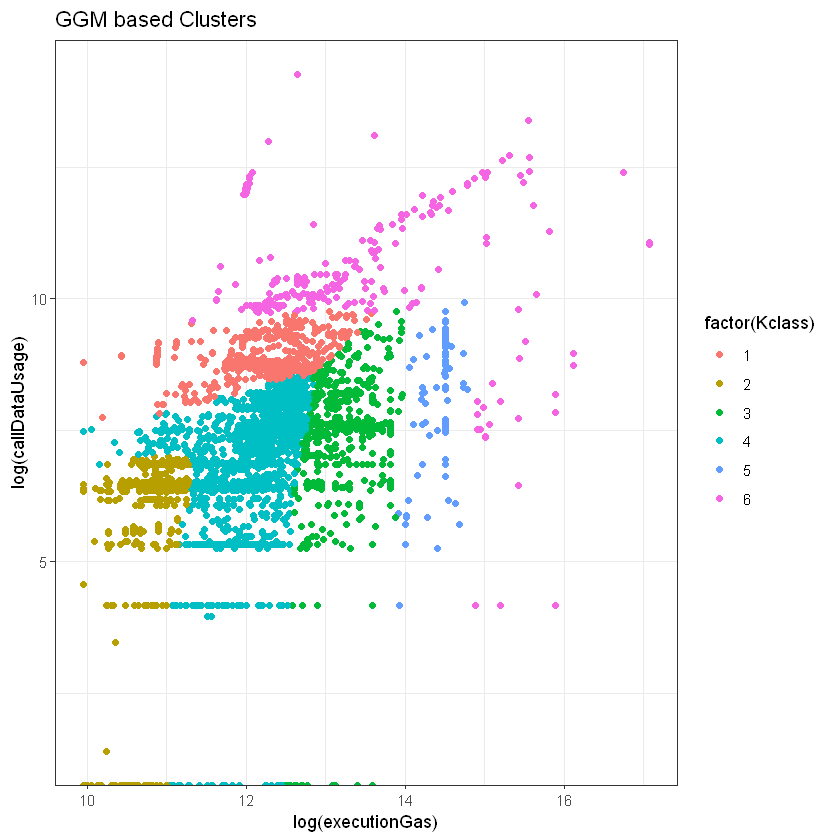

In [47]:
ggplot(df)  + 
  geom_point(aes(x = log(executionGas), y = log(callDataUsage),color=factor(Kclass))) +theme_bw()+ggtitle("GGM based Clusters")
ggsave("plotclusters1.png")

# Comparing clustering methods

In [35]:
install.packages("fpc")
library("fpc")

Installing package into 'C:/Users/matar/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

also installing the dependencies 'modeltools', 'flexmix', 'prabclus', 'diptest'




package 'modeltools' successfully unpacked and MD5 sums checked
package 'flexmix' successfully unpacked and MD5 sums checked
package 'prabclus' successfully unpacked and MD5 sums checked
package 'diptest' successfully unpacked and MD5 sums checked
package 'fpc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\matar\AppData\Local\Temp\RtmpMRkMUD\downloaded_packages


Warning message:
"package 'fpc' was built under R version 4.2.3"


In [37]:
cs = cluster.stats(dist(df[,c(4,5)]), mb$classification)

In [38]:
cs[c("within.cluster.ss","avg.silwidth")]

$within.cluster.ss
[1] 5.017455e+15

$avg.silwidth
[1] 0.3922565

In [39]:
data <- scale(X)

In [44]:
mb = Mclust(data)

In [41]:
summary(mb)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 9 components: 

 log-likelihood     n df      BIC      ICL
       44514.69 15006 73 88327.39 85154.46

Clustering table:
   1    2    3    4    5    6    7    8    9 
3792  833 1089  680 6612 1658  121  140   81 

In [42]:
cs = cluster.stats(dist(df[,c(4,5)]), mb$classification)

In [43]:
cs[c("within.cluster.ss","avg.silwidth")]

$within.cluster.ss
[1] 3.790402e+15

$avg.silwidth
[1] 0.07600819

In [45]:
summary(mb)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 9 components: 

 log-likelihood     n df      BIC      ICL
       45739.89 15006 73 90777.79 86732.09

Clustering table:
   1    2    3    4    5    6    7    8    9 
 778 1033 3751  610 5977  727  147 1929   54 

In [46]:
cs = cluster.stats(dist(df[,c(4,5)]), mb$classification)
cs[c("within.cluster.ss","avg.silwidth")]

$within.cluster.ss
[1] 4.627374e+15

$avg.silwidth
[1] 0.01743027